In [1]:
%matplotlib inline
from numpy import*
from pylab import*
import matplotlib.pyplot as plt
from h5py import File
import json
from slab.dsfit import *
from slab.aofit import *
import math

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


Warning could not load Chase AWG dll, check that dll located at 'C:\_Lib\python\slab\instruments\awg\chase\dax22000_lib_DLL32.dll'
Could not load InstrumentManagerWindow
Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_dps.dll'
Could not load labbrick


C:\ProgramData\Anaconda3\envs\py36vis\lib\site-packages\IPython\qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


# dig test1 - see a small blip 25 pts, usually signal on order of 1000pts so we're fine

 no signal going in, ch1 and ch2 (expt t1 0 to 500ns in steps of 50)

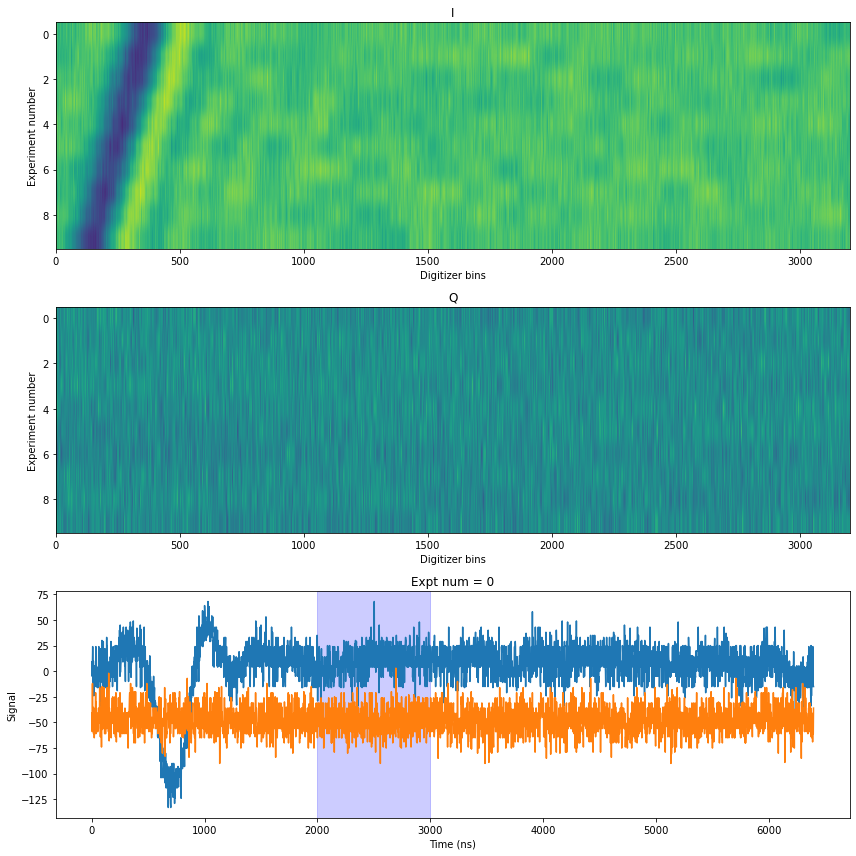

In [5]:
filenb = 7
expt_name = "t1"
phi = 0
expt_num = 0
debug=True
filename = "..\\data\\" + str(filenb).zfill(5) + "_"+expt_name.lower()+".h5"
with File(filename,'r') as a:
    hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
    experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
    quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
    expt_params = experiment_cfg[expt_name.lower()]
    readout_params = quantum_device_cfg['readout']

    #ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range'] #range of DAC card for processing
    #nu_q = quantum_device_cfg['qubit'][expt_params['on_qubits'][0]]['freq'] #expected qubit freq
    #dig_atten_dr = quantum_device_cfg['qubit_drive_digital_attenuation']
    #dig_atten_rd = quantum_device_cfg['readout_drive_digital_attenuation']
    #read_lo_pwr = quantum_device_cfg['readout_drive_lo_powers']['1']
    #qb_lo_pwr = quantum_device_cfg['qubit_drive_lo_powers']['1']
    dt_dig = hardware_cfg['awg_info']['keysight_pxi']['dt_dig']
    

    I = array(a["I"])
    Q = array(a["Q"])
    f = arange(expt_params['start'],expt_params['stop'],expt_params['step'])[:(len(I))]

    #if debug:
    #    print("DEBUG")
    #    print ("averages =",expt_params['acquisition_num'])
    #    print("Rd LO pwr= ",read_lo_pwr, "dBm")
    #    print("Qb LO pwr= ",qb_lo_pwr, "dBm")
    #    print("Rd atten= ",dig_atten_rd, "dB")
    #    print("Qb atten= ",dig_atten_dr, "dB")
    #    print("Readout params",readout_params)
    #    print("experiment params",expt_params) 

    readout_window = readout_params["window"]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(311, title='I')
    plt.imshow(I, aspect='auto')
    ax.set_xlabel('Digitizer bins')
    ax.set_ylabel('Experiment number')
    ax2 = fig.add_subplot(312, title='Q')
    plt.imshow(Q, aspect='auto')
    ax2.set_xlabel('Digitizer bins')
    ax2.set_ylabel('Experiment number')
    ax3 = fig.add_subplot(313, title='Expt num = ' + str(expt_num))
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig), I[expt_num])
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig),Q[expt_num])
    ax3.axvspan(readout_window[0], readout_window[1], alpha=0.2, color='b')
    ax3.set_xlabel('Time (ns)')
    ax3.set_ylabel('Signal')
    fig.tight_layout()
    plt.show()


# See t1 pulse in dig ch1

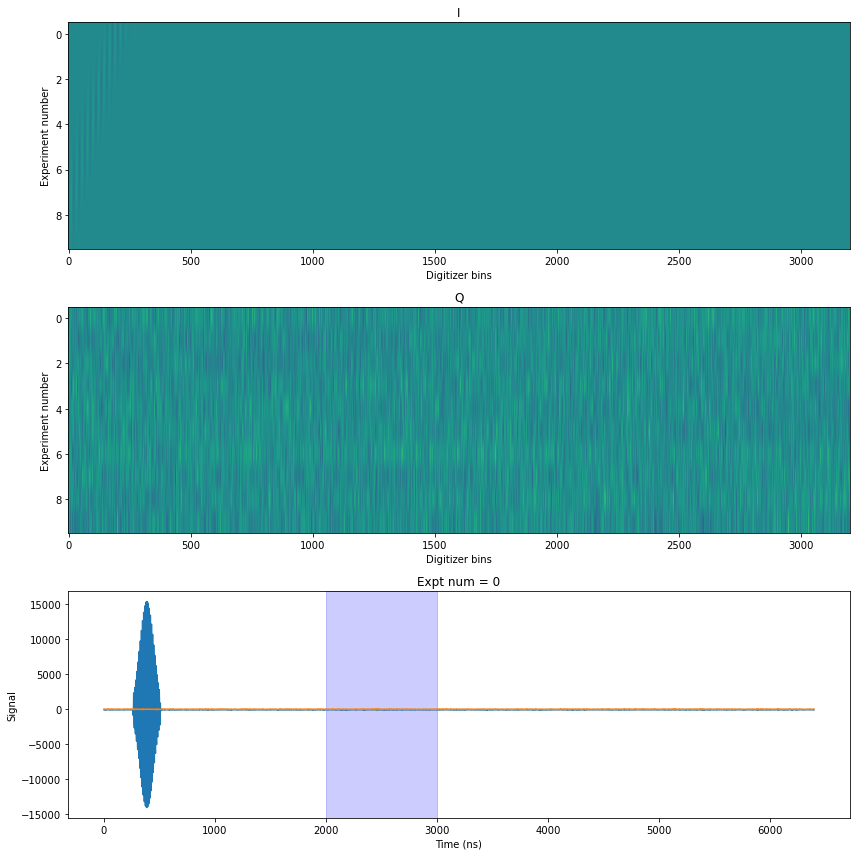

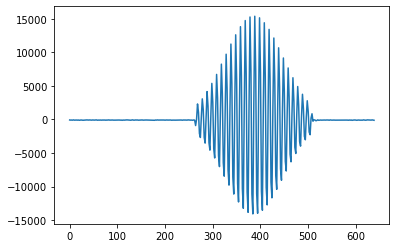

In [11]:
filenb = 8
expt_name = "t1"
phi = 0
expt_num = 0
debug=True
filename = "..\\data\\" + str(filenb).zfill(5) + "_"+expt_name.lower()+".h5"
with File(filename,'r') as a:
    hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
    experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
    quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
    expt_params = experiment_cfg[expt_name.lower()]
    readout_params = quantum_device_cfg['readout']

    #ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range'] #range of DAC card for processing
    #nu_q = quantum_device_cfg['qubit'][expt_params['on_qubits'][0]]['freq'] #expected qubit freq
    #dig_atten_dr = quantum_device_cfg['qubit_drive_digital_attenuation']
    #dig_atten_rd = quantum_device_cfg['readout_drive_digital_attenuation']
    #read_lo_pwr = quantum_device_cfg['readout_drive_lo_powers']['1']
    #qb_lo_pwr = quantum_device_cfg['qubit_drive_lo_powers']['1']
    dt_dig = hardware_cfg['awg_info']['keysight_pxi']['dt_dig']
    

    I = array(a["I"])
    Q = array(a["Q"])
    f = arange(expt_params['start'],expt_params['stop'],expt_params['step'])[:(len(I))]

    #if debug:
    #    print("DEBUG")
    #    print ("averages =",expt_params['acquisition_num'])
    #    print("Rd LO pwr= ",read_lo_pwr, "dBm")
    #    print("Qb LO pwr= ",qb_lo_pwr, "dBm")
    #    print("Rd atten= ",dig_atten_rd, "dB")
    #    print("Qb atten= ",dig_atten_dr, "dB")
    #    print("Readout params",readout_params)
    #    print("experiment params",expt_params) 

    readout_window = readout_params["window"]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(311, title='I')
    plt.imshow(I, aspect='auto')
    ax.set_xlabel('Digitizer bins')
    ax.set_ylabel('Experiment number')
    ax2 = fig.add_subplot(312, title='Q')
    plt.imshow(Q, aspect='auto')
    ax2.set_xlabel('Digitizer bins')
    ax2.set_ylabel('Experiment number')
    ax3 = fig.add_subplot(313, title='Expt num = ' + str(expt_num))
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig), I[expt_num])
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig),Q[expt_num])
    ax3.axvspan(readout_window[0], readout_window[1], alpha=0.2, color='b')
    ax3.set_xlabel('Time (ns)')
    ax3.set_ylabel('Signal')
    fig.tight_layout()
    plt.show()

    plt.plot(np.arange(I[0].size*dt_dig/10, step=dt_dig), I[expt_num][0:len(np.arange(I[0].size*dt_dig/10, step=dt_dig))])
    plt.show()

# see t1 pulse in dig ch3

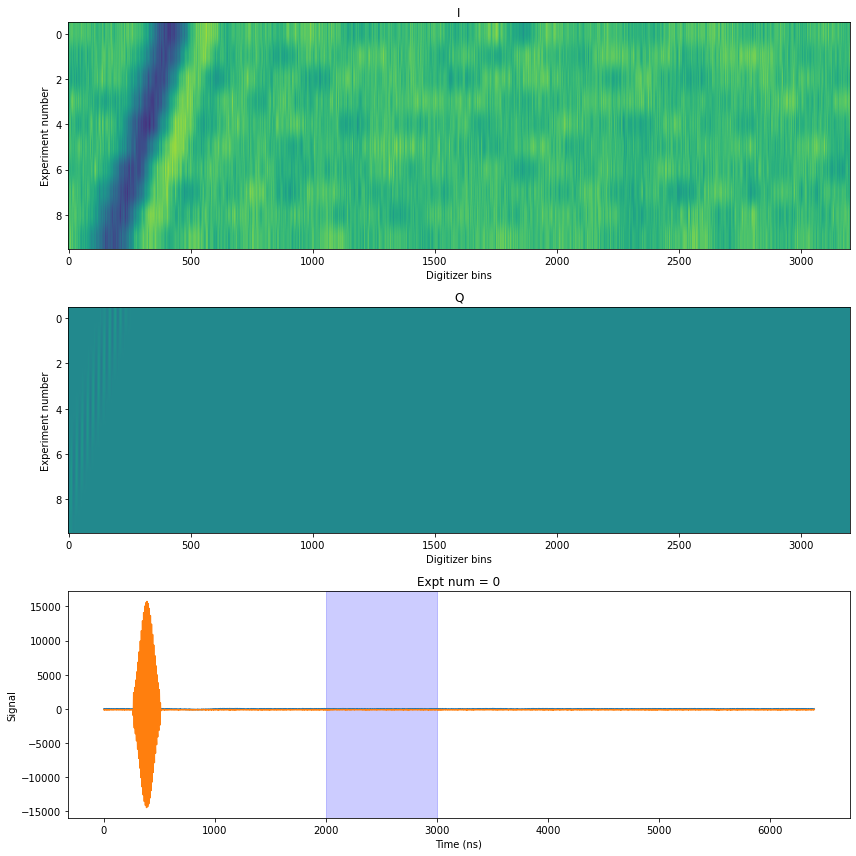

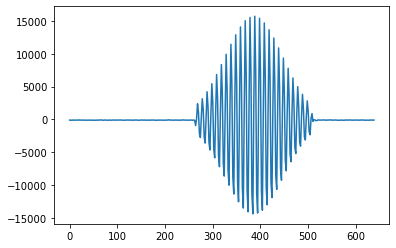

In [15]:
filenb = 15
expt_name = "t1"
phi = 0
expt_num = 0
debug=True
filename = "..\\data\\" + str(filenb).zfill(5) + "_"+expt_name.lower()+".h5"
with File(filename,'r') as a:
    hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
    experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
    quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
    expt_params = experiment_cfg[expt_name.lower()]
    readout_params = quantum_device_cfg['readout']

    #ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range'] #range of DAC card for processing
    #nu_q = quantum_device_cfg['qubit'][expt_params['on_qubits'][0]]['freq'] #expected qubit freq
    #dig_atten_dr = quantum_device_cfg['qubit_drive_digital_attenuation']
    #dig_atten_rd = quantum_device_cfg['readout_drive_digital_attenuation']
    #read_lo_pwr = quantum_device_cfg['readout_drive_lo_powers']['1']
    #qb_lo_pwr = quantum_device_cfg['qubit_drive_lo_powers']['1']
    dt_dig = hardware_cfg['awg_info']['keysight_pxi']['dt_dig']
    

    I = array(a["I"])
    Q = array(a["Q"])
    f = arange(expt_params['start'],expt_params['stop'],expt_params['step'])[:(len(I))]

    #if debug:
    #    print("DEBUG")
    #    print ("averages =",expt_params['acquisition_num'])
    #    print("Rd LO pwr= ",read_lo_pwr, "dBm")
    #    print("Qb LO pwr= ",qb_lo_pwr, "dBm")
    #    print("Rd atten= ",dig_atten_rd, "dB")
    #    print("Qb atten= ",dig_atten_dr, "dB")
    #    print("Readout params",readout_params)
    #    print("experiment params",expt_params) 

    readout_window = readout_params["window"]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(311, title='I')
    plt.imshow(I, aspect='auto')
    ax.set_xlabel('Digitizer bins')
    ax.set_ylabel('Experiment number')
    ax2 = fig.add_subplot(312, title='Q')
    plt.imshow(Q, aspect='auto')
    ax2.set_xlabel('Digitizer bins')
    ax2.set_ylabel('Experiment number')
    ax3 = fig.add_subplot(313, title='Expt num = ' + str(expt_num))
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig), I[expt_num])
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig),Q[expt_num])
    ax3.axvspan(readout_window[0], readout_window[1], alpha=0.2, color='b')
    ax3.set_xlabel('Time (ns)')
    ax3.set_ylabel('Signal')
    fig.tight_layout()
    plt.show()

    plt.plot(np.arange(Q[0].size*dt_dig/10, step=dt_dig), Q[expt_num][0:len(np.arange(Q[0].size*dt_dig/10, step=dt_dig))])
    plt.show()

# see t1 pulse in dig ch2

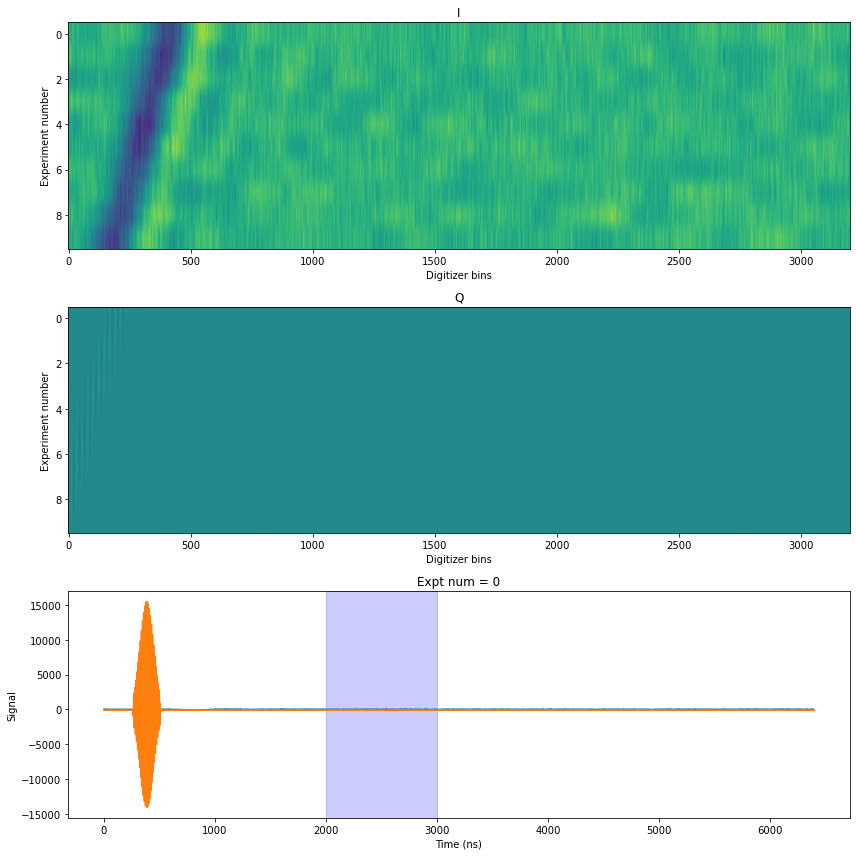

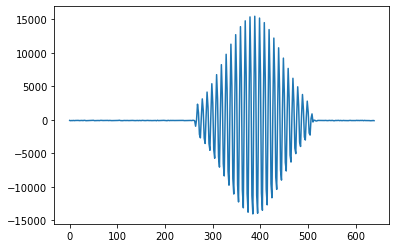

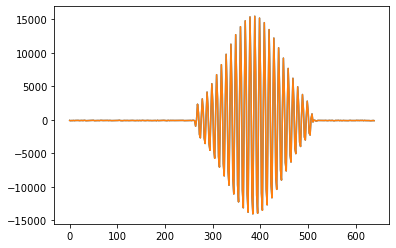

In [6]:
filenb = 19
expt_name = "t1"
phi = 0
expt_num = 0
debug=True
filename = "..\\data\\" + str(filenb).zfill(5) + "_"+expt_name.lower()+".h5"
with File(filename,'r') as a:
    hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
    experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
    quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
    expt_params = experiment_cfg[expt_name.lower()]
    readout_params = quantum_device_cfg['readout']

    #ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range'] #range of DAC card for processing
    #nu_q = quantum_device_cfg['qubit'][expt_params['on_qubits'][0]]['freq'] #expected qubit freq
    #dig_atten_dr = quantum_device_cfg['qubit_drive_digital_attenuation']
    #dig_atten_rd = quantum_device_cfg['readout_drive_digital_attenuation']
    #read_lo_pwr = quantum_device_cfg['readout_drive_lo_powers']['1']
    #qb_lo_pwr = quantum_device_cfg['qubit_drive_lo_powers']['1']
    dt_dig = hardware_cfg['awg_info']['keysight_pxi']['dt_dig']
    

    I = array(a["I"])
    Q = array(a["Q"])
    f = arange(expt_params['start'],expt_params['stop'],expt_params['step'])[:(len(I))]

    #if debug:
    #    print("DEBUG")
    #    print ("averages =",expt_params['acquisition_num'])
    #    print("Rd LO pwr= ",read_lo_pwr, "dBm")
    #    print("Qb LO pwr= ",qb_lo_pwr, "dBm")
    #    print("Rd atten= ",dig_atten_rd, "dB")
    #    print("Qb atten= ",dig_atten_dr, "dB")
    #    print("Readout params",readout_params)
    #    print("experiment params",expt_params) 

    readout_window = readout_params["window"]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(311, title='I')
    plt.imshow(I, aspect='auto')
    ax.set_xlabel('Digitizer bins')
    ax.set_ylabel('Experiment number')
    ax2 = fig.add_subplot(312, title='Q')
    plt.imshow(Q, aspect='auto')
    ax2.set_xlabel('Digitizer bins')
    ax2.set_ylabel('Experiment number')
    ax3 = fig.add_subplot(313, title='Expt num = ' + str(expt_num))
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig), I[expt_num])
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig),Q[expt_num])
    ax3.axvspan(readout_window[0], readout_window[1], alpha=0.2, color='b')
    ax3.set_xlabel('Time (ns)')
    ax3.set_ylabel('Signal')
    fig.tight_layout()
    plt.show()

    plt.plot(np.arange(Q[0].size*dt_dig/10, step=dt_dig), Q[expt_num][0:len(np.arange(Q[0].size*dt_dig/10, step=dt_dig))])
    plt.show()
    
    plt.plot(np.arange(Q[0].size*dt_dig/10, step=dt_dig), Q[expt_num][0:len(np.arange(Q[0].size*dt_dig/10, step=dt_dig))])
    plt.plot(np.arange(I[0].size*dt_dig/10, step=dt_dig), Q[expt_num][0:len(np.arange(Q[0].size*dt_dig/10, step=dt_dig))])
    plt.show()

# see t1 pulse in dig ch4

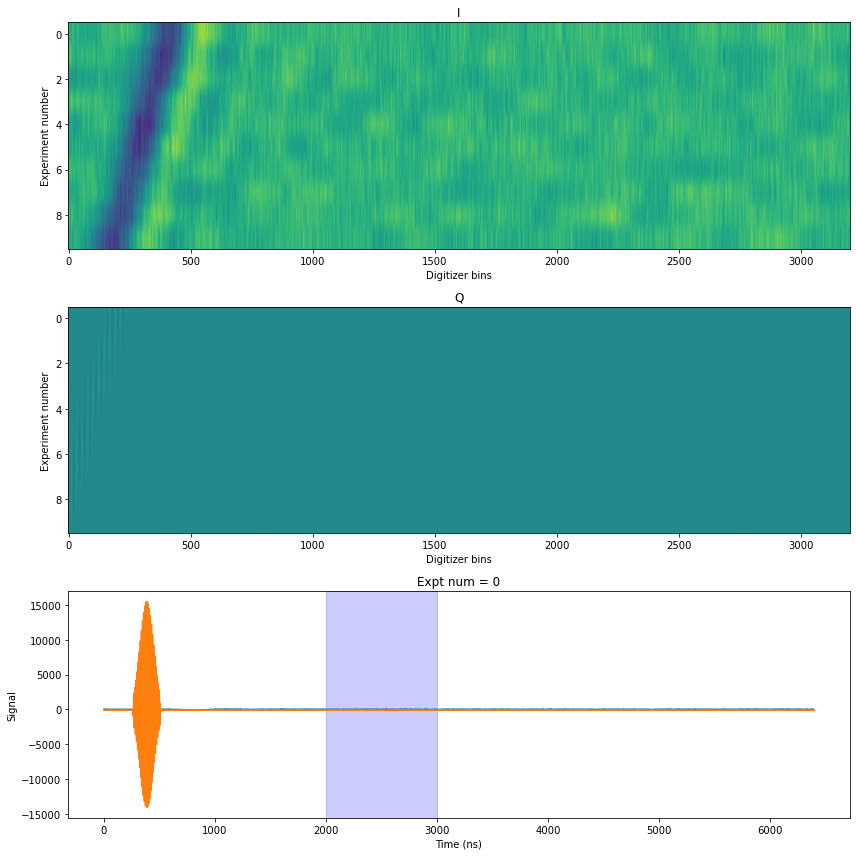

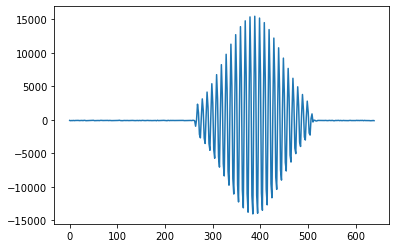

In [16]:
filenb = 19
expt_name = "t1"
phi = 0
expt_num = 0
debug=True
filename = "..\\data\\" + str(filenb).zfill(5) + "_"+expt_name.lower()+".h5"
with File(filename,'r') as a:
    hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
    experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
    quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
    expt_params = experiment_cfg[expt_name.lower()]
    readout_params = quantum_device_cfg['readout']

    #ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range'] #range of DAC card for processing
    #nu_q = quantum_device_cfg['qubit'][expt_params['on_qubits'][0]]['freq'] #expected qubit freq
    #dig_atten_dr = quantum_device_cfg['qubit_drive_digital_attenuation']
    #dig_atten_rd = quantum_device_cfg['readout_drive_digital_attenuation']
    #read_lo_pwr = quantum_device_cfg['readout_drive_lo_powers']['1']
    #qb_lo_pwr = quantum_device_cfg['qubit_drive_lo_powers']['1']
    dt_dig = hardware_cfg['awg_info']['keysight_pxi']['dt_dig']
    

    I = array(a["I"])
    Q = array(a["Q"])
    f = arange(expt_params['start'],expt_params['stop'],expt_params['step'])[:(len(I))]

    #if debug:
    #    print("DEBUG")
    #    print ("averages =",expt_params['acquisition_num'])
    #    print("Rd LO pwr= ",read_lo_pwr, "dBm")
    #    print("Qb LO pwr= ",qb_lo_pwr, "dBm")
    #    print("Rd atten= ",dig_atten_rd, "dB")
    #    print("Qb atten= ",dig_atten_dr, "dB")
    #    print("Readout params",readout_params)
    #    print("experiment params",expt_params) 

    readout_window = readout_params["window"]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(311, title='I')
    plt.imshow(I, aspect='auto')
    ax.set_xlabel('Digitizer bins')
    ax.set_ylabel('Experiment number')
    ax2 = fig.add_subplot(312, title='Q')
    plt.imshow(Q, aspect='auto')
    ax2.set_xlabel('Digitizer bins')
    ax2.set_ylabel('Experiment number')
    ax3 = fig.add_subplot(313, title='Expt num = ' + str(expt_num))
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig), I[expt_num])
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig),Q[expt_num])
    ax3.axvspan(readout_window[0], readout_window[1], alpha=0.2, color='b')
    ax3.set_xlabel('Time (ns)')
    ax3.set_ylabel('Signal')
    fig.tight_layout()
    plt.show()

    plt.plot(np.arange(Q[0].size*dt_dig/10, step=dt_dig), Q[expt_num][0:len(np.arange(Q[0].size*dt_dig/10, step=dt_dig))])
    plt.show()

# Look at ch1 blip - looks like it was qb tone

## changes with t1 time - t1 go to 1us

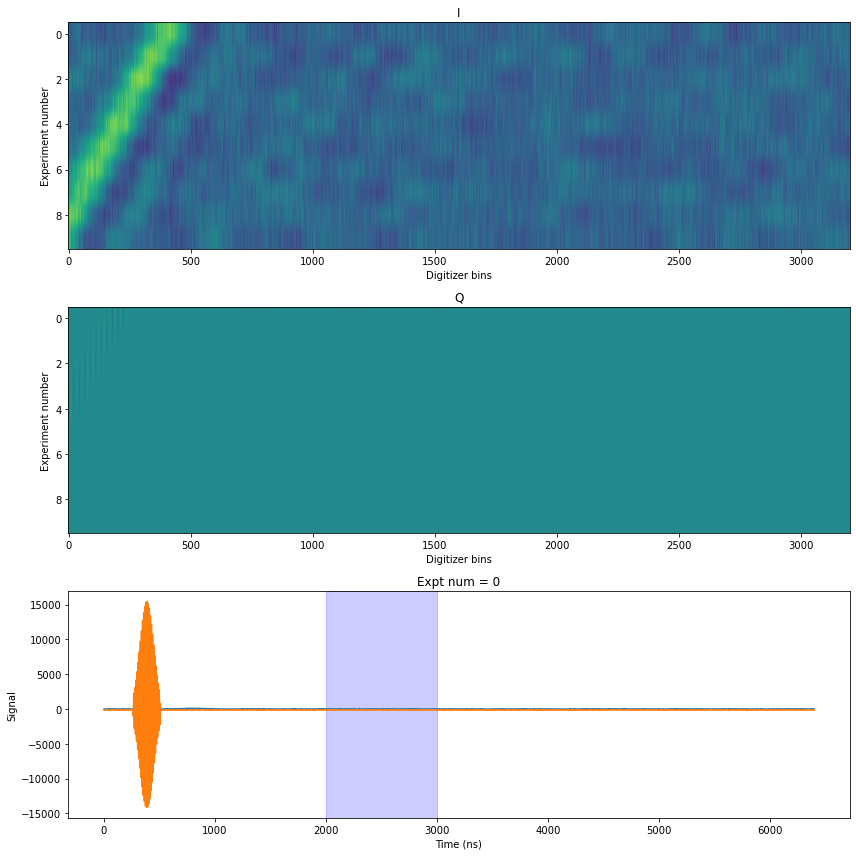

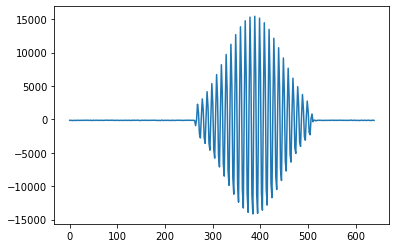

In [7]:
filenb = 22
expt_name = "t1"
phi = 0
expt_num = 0
debug=True
filename = "..\\data\\" + str(filenb).zfill(5) + "_"+expt_name.lower()+".h5"
with File(filename,'r') as a:
    hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
    experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
    quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
    expt_params = experiment_cfg[expt_name.lower()]
    readout_params = quantum_device_cfg['readout']

    #ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range'] #range of DAC card for processing
    #nu_q = quantum_device_cfg['qubit'][expt_params['on_qubits'][0]]['freq'] #expected qubit freq
    #dig_atten_dr = quantum_device_cfg['qubit_drive_digital_attenuation']
    #dig_atten_rd = quantum_device_cfg['readout_drive_digital_attenuation']
    #read_lo_pwr = quantum_device_cfg['readout_drive_lo_powers']['1']
    #qb_lo_pwr = quantum_device_cfg['qubit_drive_lo_powers']['1']
    dt_dig = hardware_cfg['awg_info']['keysight_pxi']['dt_dig']
    

    I = array(a["I"])
    Q = array(a["Q"])
    f = arange(expt_params['start'],expt_params['stop'],expt_params['step'])[:(len(I))]

    #if debug:
    #    print("DEBUG")
    #    print ("averages =",expt_params['acquisition_num'])
    #    print("Rd LO pwr= ",read_lo_pwr, "dBm")
    #    print("Qb LO pwr= ",qb_lo_pwr, "dBm")
    #    print("Rd atten= ",dig_atten_rd, "dB")
    #    print("Qb atten= ",dig_atten_dr, "dB")
    #    print("Readout params",readout_params)
    #    print("experiment params",expt_params) 

    readout_window = readout_params["window"]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(311, title='I')
    plt.imshow(I, aspect='auto')
    ax.set_xlabel('Digitizer bins')
    ax.set_ylabel('Experiment number')
    ax2 = fig.add_subplot(312, title='Q')
    plt.imshow(Q, aspect='auto')
    ax2.set_xlabel('Digitizer bins')
    ax2.set_ylabel('Experiment number')
    ax3 = fig.add_subplot(313, title='Expt num = ' + str(expt_num))
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig), I[expt_num])
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig),Q[expt_num])
    ax3.axvspan(readout_window[0], readout_window[1], alpha=0.2, color='b')
    ax3.set_xlabel('Time (ns)')
    ax3.set_ylabel('Signal')
    fig.tight_layout()
    plt.show()

    plt.plot(np.arange(Q[0].size*dt_dig/10, step=dt_dig), Q[expt_num][0:len(np.arange(Q[0].size*dt_dig/10, step=dt_dig))])
    plt.show()

## goes away if disconnect blue cable from dig; apparently was picking up qb tone

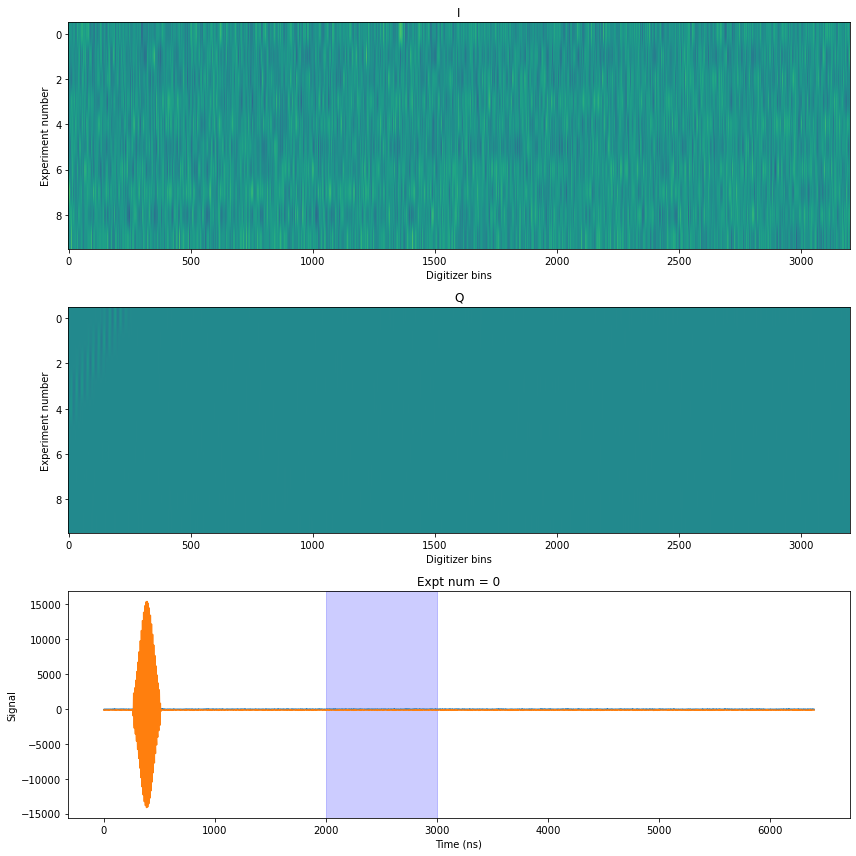

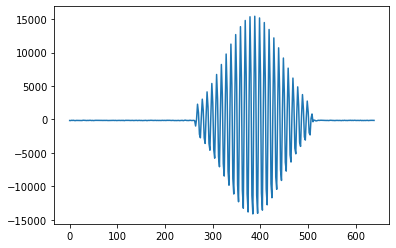

In [8]:
filenb = 23
expt_name = "t1"
phi = 0
expt_num = 0
debug=True
filename = "..\\data\\" + str(filenb).zfill(5) + "_"+expt_name.lower()+".h5"
with File(filename,'r') as a:
    hardware_cfg =  (json.loads(a.attrs['hardware_cfg']))
    experiment_cfg =  (json.loads(a.attrs['experiment_cfg']))
    quantum_device_cfg =  (json.loads(a.attrs['quantum_device_cfg']))
    expt_params = experiment_cfg[expt_name.lower()]
    readout_params = quantum_device_cfg['readout']

    #ran = hardware_cfg['awg_info']['keysight_pxi']['m3102_vpp_range'] #range of DAC card for processing
    #nu_q = quantum_device_cfg['qubit'][expt_params['on_qubits'][0]]['freq'] #expected qubit freq
    #dig_atten_dr = quantum_device_cfg['qubit_drive_digital_attenuation']
    #dig_atten_rd = quantum_device_cfg['readout_drive_digital_attenuation']
    #read_lo_pwr = quantum_device_cfg['readout_drive_lo_powers']['1']
    #qb_lo_pwr = quantum_device_cfg['qubit_drive_lo_powers']['1']
    dt_dig = hardware_cfg['awg_info']['keysight_pxi']['dt_dig']
    

    I = array(a["I"])
    Q = array(a["Q"])
    f = arange(expt_params['start'],expt_params['stop'],expt_params['step'])[:(len(I))]

    #if debug:
    #    print("DEBUG")
    #    print ("averages =",expt_params['acquisition_num'])
    #    print("Rd LO pwr= ",read_lo_pwr, "dBm")
    #    print("Qb LO pwr= ",qb_lo_pwr, "dBm")
    #    print("Rd atten= ",dig_atten_rd, "dB")
    #    print("Qb atten= ",dig_atten_dr, "dB")
    #    print("Readout params",readout_params)
    #    print("experiment params",expt_params) 

    readout_window = readout_params["window"]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(311, title='I')
    plt.imshow(I, aspect='auto')
    ax.set_xlabel('Digitizer bins')
    ax.set_ylabel('Experiment number')
    ax2 = fig.add_subplot(312, title='Q')
    plt.imshow(Q, aspect='auto')
    ax2.set_xlabel('Digitizer bins')
    ax2.set_ylabel('Experiment number')
    ax3 = fig.add_subplot(313, title='Expt num = ' + str(expt_num))
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig), I[expt_num])
    ax3.plot(np.arange(I[0].size*dt_dig, step=dt_dig),Q[expt_num])
    ax3.axvspan(readout_window[0], readout_window[1], alpha=0.2, color='b')
    ax3.set_xlabel('Time (ns)')
    ax3.set_ylabel('Signal')
    fig.tight_layout()
    plt.show()

    plt.plot(np.arange(Q[0].size*dt_dig/10, step=dt_dig), Q[expt_num][0:len(np.arange(Q[0].size*dt_dig/10, step=dt_dig))])
    plt.show()